## Scraping EPL players data from Web page


Here is how to scrape the EPL (English Premier League) players data from www.spotrac.com.     
I'm going to scrape team name, player's name, player's position, and annual salary (in UK pound) data for each of the roster player on the pages.     
Then I'm going to draw a Tree Map showing each player as a rectangle sized by his annual salary.      

## Libraries

I used the following libraries for web scraping and data manipulating.

In [1]:
library(rvest)
library(tidyverse)
theme_set(theme_light())

Loading required package: xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()         masks stats::filter()
x readr::guess_encoding() masks rvest::guess_encoding()
x dplyr::lag()            masks stats::lag()
x purrr::pluck()          masks rvest::pluck()


## Data Source  

www.spotrac.com is the web site where I got the data from.      
They have EPL roster list with position and salary (in UK pound) for each team in separate url.      
Below is the top page for EPL team list.        
https://www.spotrac.com/epl/

In [2]:
# store the url in epl
epl <- "https://www.spotrac.com/epl/"

## Team List

First, by using rvest functions, I'm going to create a data frame for team list.

In [3]:
# get the team names and url and create a data frame
teams<-
read_html(epl) %>% 
  html_nodes(".team-name") %>%
  html_text()

urls <- 
read_html(epl) %>% 
  html_nodes(".team-name") %>%
  html_attr("href")

team_list <-
  data.frame(team = teams, url = urls)

In [4]:
team_list

team,url
AFC Bournemouth,https://www.spotrac.com/epl/afc-bournemouth/
Arsenal F.C.,https://www.spotrac.com/epl/arsenal-f.c/
Brighton & Hove Albion,https://www.spotrac.com/epl/brighton-hove-albion/
Burnley F.C.,https://www.spotrac.com/epl/burnley-f.c/
Cardiff City F.C.,https://www.spotrac.com/epl/cardiff-city-f.c/
Chelsea F.C.,https://www.spotrac.com/epl/chelsea-f.c/
Crystal Palace,https://www.spotrac.com/epl/crystal-palace/
Everton F.C.,https://www.spotrac.com/epl/everton-f.c/
Fulham F.C.,https://www.spotrac.com/epl/fulham-f.c/
Huddersfield Town,https://www.spotrac.com/epl/huddersfield-town/


## Roster List

Next, by looping over each team's url, I'm going to create three vectors, players_name, position, and salary.    
And then put it together with team name and create one data frame including all these information for all 20 teams.     

In [5]:
# empty vectors
player_name <- c()
position <- c()
salary <- c()
team_name <- c()

In [6]:
# loop for 20 teams

for (i in 1:20){
    
    team_url <- paste0(team_list$url[i],"payroll/")
    
    # get all the table in a list
    table_list <- read_html(team_url) %>%
      html_table()
    
    # the first table includes roster list
    rosters <- data.frame(table_list[1])
    n <- nrow(rosters)
    
    # create three vectors + team name vector
    player_name <- append(player_name, rosters[,1])
    position <- append(position, rosters[,2])
    salary <- append(salary, rosters[,6])                
    team_name <- append(team_name, rep(as.character(team_list$team[i]),n))
}

In [7]:
# combine four vectors and make a data frame
all_rosters <-
  data.frame(team_name = team_name, player_name = player_name, position = position, salary = salary)

## Cleaning the data

Here is how the data frame looks like.

In [8]:
str(all_rosters)

'data.frame':	556 obs. of  4 variables:
 $ team_name  : Factor w/ 20 levels "AFC Bournemouth",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ player_name: Factor w/ 554 levels "Agosto Ramírez\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tFabricio Agosto Ramírez",..: 116 40 537 259 4 56 93 221 104 182 ...
 $ position   : Factor w/ 4 levels "D","F","GK","M": 2 3 2 2 1 3 1 4 1 4 ...
 $ salary     : Factor w/ 71 levels "-","£1,040,000",..: 50 38 35 27 26 26 26 17 16 16 ...


### Players' Name

Player name includes \n (newline) and \t (tab) characters, which is not good.    
We want just players' name here, so I'm going to clean it.

In [9]:
head(all_rosters$player_name)

[1] Defoe\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tJermain Defoe  
[2] Begovic\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tAsmir Begovic
[3] Wilson\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tCallum Wilson 
[4] King\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tJoshua King     
[5] Ake\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tNathan Ake       
[6] Boruc\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tArtur Boruc    
554 Levels: Agosto Ramírez\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tFabricio Agosto Ramírez ...

Looks like player's full name is in the last of each string.      
So, I'm going to split the string by "\t" and reverse the order of the elements and take take the first one.

In [10]:
all_rosters$player_name <-
all_rosters$player_name %>%
  str_split("\t") %>%
  map(rev) %>% # reverse the list
  map(1) %>% # take the first factor
  as.character()

In [11]:
head(all_rosters$player_name)

[1] "Jermain Defoe" "Asmir Begovic" "Callum Wilson" "Joshua King"  
[5] "Nathan Ake"    "Artur Boruc"

### Salary

Data type of Salary here is factor, instead of integer.       
So it needs to be converted to integer data type.     
(Note that data includes "-", which is missing value.)

In [12]:
head(all_rosters$salary)

[1] £5,380,000 £3,640,000 £3,120,000 £2,340,000 £2,080,000 £2,080,000
71 Levels: - £1,040,000 £1,092,000 £1,144,000 £1,196,000 ... £988,000

In [13]:
# NA for "-"
all_rosters$salary[all_rosters$salary == "-"] <- NA


# convert value to integer
all_rosters$salary <- as.character(all_rosters$salary) %>%
  str_replace("£","") %>% # remove currency sign
  str_replace_all(",","") %>% # remove comma
  as.integer()

In [14]:
head(as.integer(all_rosters$salary))

[1] 5380000 3640000 3120000 2340000 2080000 2080000

### Players' Position

One last thing for cleaning is rephrasing position characters.    
"F" stands for forward("FW"), "M" stands for midfielder("MF"), and "D" stands for defender("DF").   
So, I'm going to convert them and change the factor level order.

In [15]:
# make it character first
all_rosters$position <- as.character(all_rosters$position)

all_rosters$position[all_rosters$position=="D"] <- "DF"
all_rosters$position[all_rosters$position=="F"] <- "FW"
all_rosters$position[all_rosters$position=="M"] <- "MF"

# re-level the factor
all_rosters$position <- factor(all_rosters$position, levels = c("FW","MF","DF","GK"))

In [16]:
str(all_rosters)

'data.frame':	556 obs. of  4 variables:
 $ team_name  : Factor w/ 20 levels "AFC Bournemouth",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ player_name: chr  "Jermain Defoe" "Asmir Begovic" "Callum Wilson" "Joshua King" ...
 $ position   : Factor w/ 4 levels "FW","MF","DF",..: 1 4 1 1 3 4 3 2 3 2 ...
 $ salary     : int  5380000 3640000 3120000 2340000 2080000 2080000 2080000 1976000 1820000 1820000 ...


Now the data frame looks clean.

## Tree Map

We can now plot the data as tree map.     
I'm going to use treemap library and d3treeR library to show the data.    

In [17]:
library(treemap)

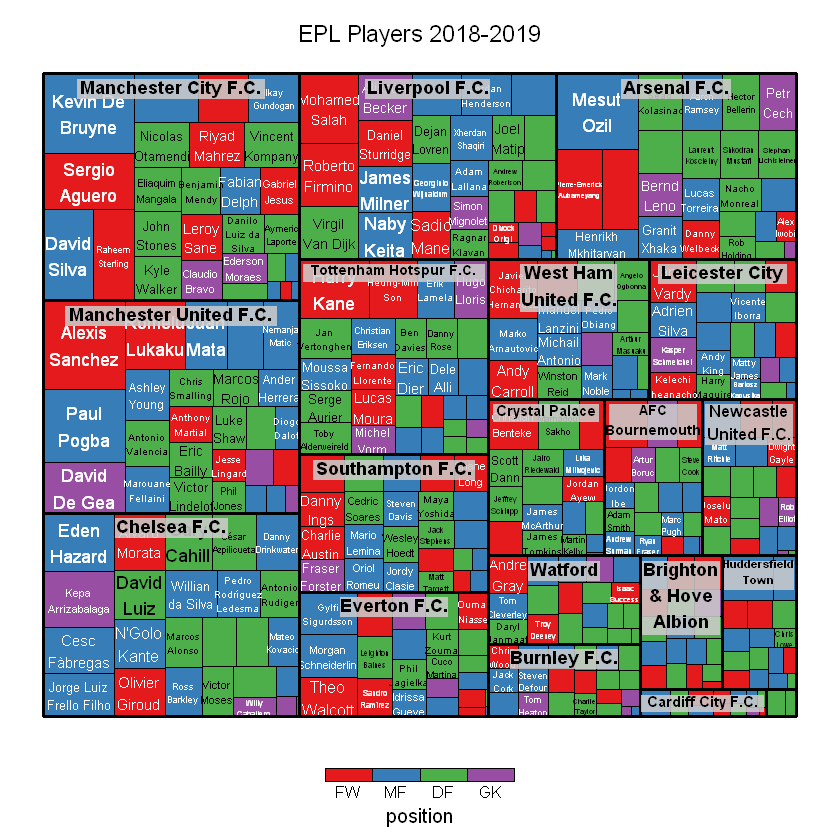

In [18]:
EPL_Tree <- 
treemap(all_rosters, 
        index = c("team_name","player_name"), 
        title = "EPL Players 2018-2019",
        vSize = "salary", 
        vColor = "position",
        type = "categorical",
        palette = "Set1",
        align.labels = list(c("center", "top"), c("center", "center")),
        position.legend = "bottom")

If you don't have d3treeR package installed.      
Run following to install.

In [ ]:
install.packages("devtools")
devtools::install_github("timelyportfolio/d3treeR")

In [19]:
library(d3treeR)

In [20]:
d3tree2(EPL_Tree)

HTML widgets cannot be represented in plain text (need html)